In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models: ANN, ELM, SVR, KRR, RF, XGB
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

from mealpy.evolutionary_based.GA import BaseGA, MultiGA, EliteSingleGA, SingleGA
from mealpy.swarm_based.PSO import CL_PSO
from mealpy.swarm_based.MRFO import OriginalMRFO
from mealpy.swarm_based.SCSO import OriginalSCSO

from mealpy.utils.problem import Problem

Import the data

In [ ]:
rawdata = pd.read_excel("Data No Storage.xlsx")

In [ ]:
import random

def fixed_randomization(data):
    np.random.seed(42) 
    rand_data = data.sample(frac=1).reset_index(drop=True)
    return rand_data

rand_data = fixed_randomization(rawdata)

In [ ]:
X_data_unscale = rand_data[rand_data.columns[0:6]]
Y_data_unscale = rand_data[rand_data.columns[6:11]]

Y_data = Y_data_unscale

In [ ]:
SS = StandardScaler()
MMS = MinMaxScaler()
X_data = SS.fit_transform(X_data_unscale)
X_data_scaled = pd.DataFrame(X_data, columns=X_data_unscale.columns)

# Now X_data_scaled has the same column names as X_data_unscale
X_data = X_data_scaled.copy()  # Optionally, you can directly overwrite X_data_scaled if you don't need it later


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [ ]:
y1_data = Y_data[Y_data.columns[0:1]]
y2_data = Y_data[Y_data.columns[1:2]]
y3_data = Y_data[Y_data.columns[2:3]]
y4_data = Y_data[Y_data.columns[3:4]]
y5_data = Y_data[Y_data.columns[4:5]]


y1_train = Y_train[Y_train.columns[0:1]]
y2_train = Y_train[Y_train.columns[1:2]]
y3_train = Y_train[Y_train.columns[2:3]]
y4_train = Y_train[Y_train.columns[3:4]]
y5_train = Y_train[Y_train.columns[4:5]]


y1_test = Y_test[Y_test.columns[0:1]]
y2_test = Y_test[Y_test.columns[1:2]]
y3_test = Y_test[Y_test.columns[2:3]]
y4_test = Y_test[Y_test.columns[3:4]]
y5_test = Y_test[Y_test.columns[4:5]]

In [ ]:
y_data = y1_data
y_train = y1_train
y_test = y1_test

y1_params = {'C': 792455.0628709563, 'epsilon': 1.615158320784387, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.018028712570561923}


model_y1 = SVR(**y1_params)
model_y1.fit(X_data, y_data)

SVR(C=792455.0628709563, degree=4, epsilon=1.615158320784387,
    gamma=0.018028712570561923)

In [ ]:
y_data = y2_data
y_train = y2_train
y_test = y2_test

y2_params = {'C': 35529.565119700674, 'epsilon': 0.01398121990100254, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.00759513082892152}

model_y2 = SVR(**y2_params)
model_y2.fit(X_data, y_data)

SVR(C=35529.565119700674, degree=4, epsilon=0.01398121990100254,
    gamma=0.00759513082892152)

In [ ]:
y_data = y3_data
y_train = y3_train
y_test = y3_test

y3_params = {'C': 741046.8928371427, 'epsilon': 0.010895466956371502, 'kernel': 'rbf', 'degree': 5, 'gamma': 0.009751068786055191}

model_y3 = SVR(**y3_params)
model_y3.fit(X_data, y_data)

SVR(C=741046.8928371427, degree=5, epsilon=0.010895466956371502,
    gamma=0.009751068786055191)

In [ ]:
y_data = y4_data
y_train = y4_train
y_test = y4_test

model_y4 = MLPRegressor(hidden_layer_sizes=(33, 10, 8, 40), activation='relu', alpha=0.20068666427656182, solver='lbfgs', random_state=52)

model_y4.fit(X_data, y_data)

MLPRegressor(alpha=0.20068666427656182, hidden_layer_sizes=(33, 10, 8, 40),
             random_state=52, solver='lbfgs')

In [ ]:
y_data = y5_data
y_train = y5_train
y_test = y5_test

y5_params = {'C': 632095.3349429701, 'epsilon': 0.033670933698926056, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.008681588987945016}

model_y5 = SVR(**y5_params)
model_y5.fit(X_data, y_data)

SVR(C=632095.3349429701, degree=1, epsilon=0.033670933698926056,
    gamma=0.008681588987945016)

In [ ]:
# Define prediction functions
def A(X_data):
    return model_y1.predict(np.array(X_data).reshape(1, -1))

def B(X_data):
    return model_y2.predict(np.array(X_data).reshape(1, -1))

def C(X_data):
    return model_y3.predict(np.array(X_data).reshape(1, -1))

def D(X_data):
    return model_y4.predict(np.array(X_data).reshape(1, -1))



# Objective function
def obj_fun(solution):
    val1 = A(solution)
    val2 = B(solution)
    val3 = C(solution)
    val4 = D(solution)

    val = [val1, val2, val3, val4]
    val = [item for sublist in val for item in sublist]

    return val

# Define problem dictionary for genetic algorithm
problem_dict1 = {
    "fit_func": obj_fun,
    "lb": [X_data['PP1'].min(), X_data['Nuclear'].min(), X_data['Wind'].min(), X_data['PV'].min(), X_data['RH'].min(), X_data['CSP'].min()],
    "ub": [X_data['PP1'].max(), X_data['Nuclear'].max(), X_data['Wind'].max(), X_data['PV'].max(), X_data['RH'].max(), X_data['CSP'].max()],
    "minmax": "min",
    "obj_weights": [1, 1, 1, 1]
}

In [ ]:
epoch = 200
pop_size = 20
pc = 0.001
pm = 0.05
model_ga = BaseGA(epoch, pop_size, pc, pm)
best_position_ga, best_fitness_ga = model_ga.solve(problem_dict1)

print("Best Solution:")
print("X1:", best_position_ga[0])
print("X2:", best_position_ga[1])
print("Best Fitness:", best_fitness_ga)

print(model_ga.solution[0])
print(f"fitness: {model_ga.solution[1][0]}")
print(f"objective values: {model_ga.solution[1][1]}")
print("Sum of variables:", sum(model_ga.solution[0]))

2024/05/21 05:08:48 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving 4-objective optimization problem with weights: [1 1 1 1].


2024/05/21 05:08:48 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 1, Current best: 97651.75660686429, Global best: 97651.75660686429, Runtime: 0.03003 seconds
2024/05/21 05:08:49 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 2, Current best: 97513.9848853011, Global best: 97513.9848853011, Runtime: 0.03244 seconds
2024/05/21 05:08:49 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 3, Current best: 97651.75660686429, Global best: 97513.9848853011, Runtime: 0.03531 seconds
2024/05/21 05:08:49 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 4, Current best: 97651.75660686429, Global best: 97513.9848853011, Runtime: 0.02673 seconds
2024/05/21 05:08:49 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 5, Current best: 97640.94318167266, Global best: 97513.9848853011, Runtime: 0.03009 seconds
2024/05/21 05:08:49 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 6, Current best: 9

Best Solution:
X1: 1.119561188250644
X2: -0.042794196022591935
Best Fitness: 88332.99098038355
[ 1.11956119 -0.0427942   0.02750056 -0.72244753  0.13830575 -1.15761651]
fitness: 88332.99098038355
objective values: [87850.26387377654, 487.52451439156374, -4.854649299033582, 0.05724151447757936]
Sum of variables: -0.6374907377929124


In [ ]:
MS = pd.DataFrame(model_ga.solution[0])
MS_df = pd.DataFrame(MS)
MS = MS_df.T
s_mean = SS.mean_
s_scale = SS.scale_
Optimized_Inputs = (MS * s_scale) + s_mean
Optimized_Inputs

,0,1,2,3,4,5
0,148297.699827,14446.159463,7677.955529,37667.446005,11193.297833,30.299607


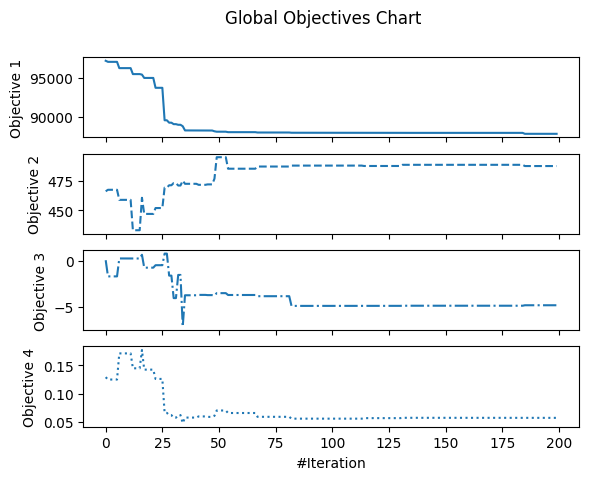

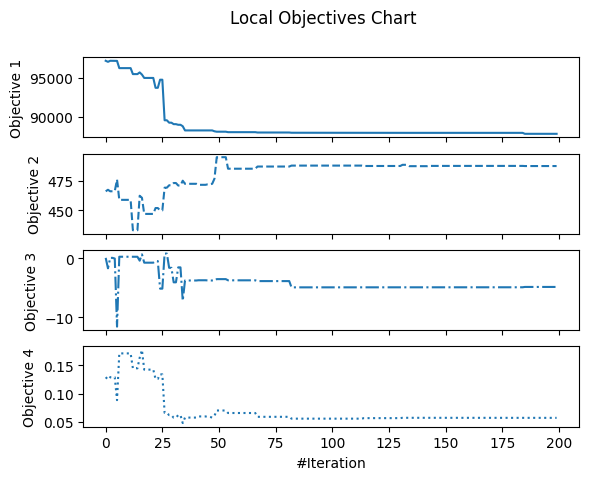

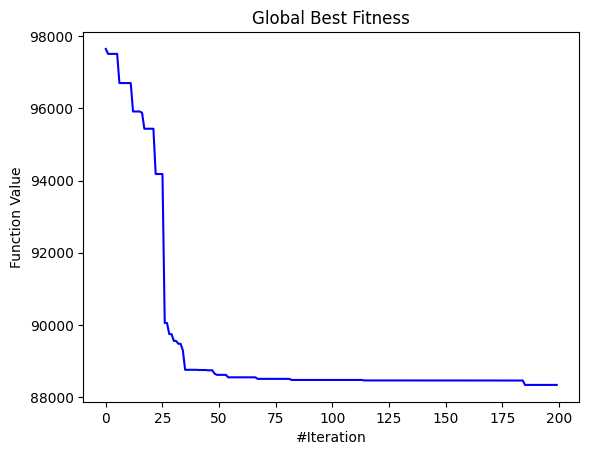

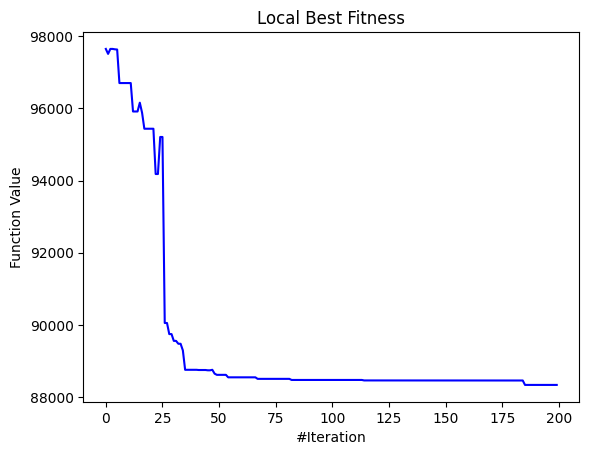

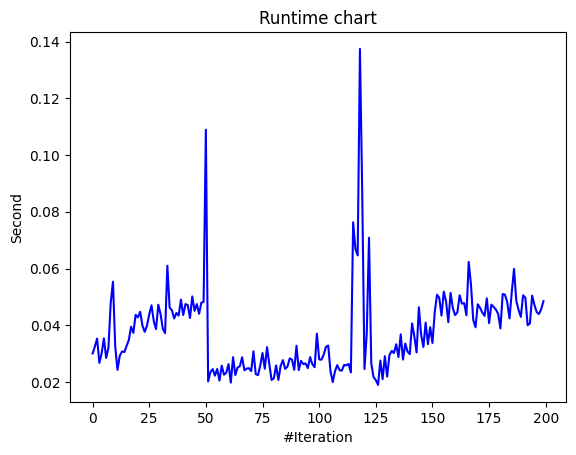

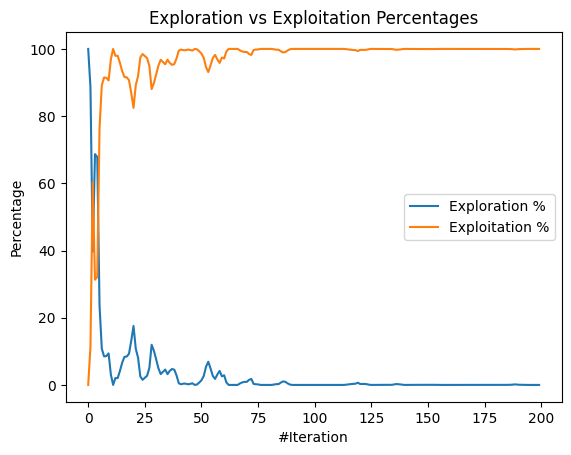

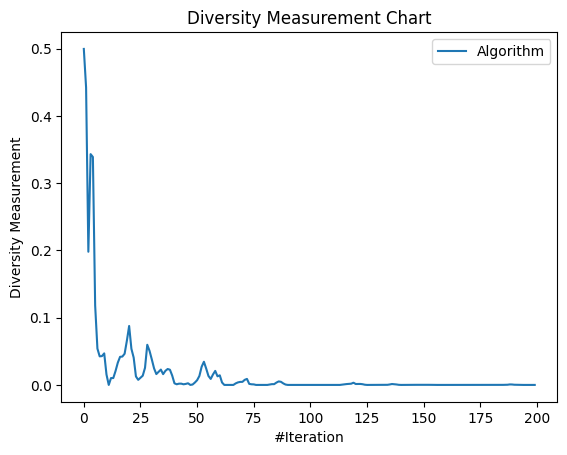

In [ ]:
model_ga.history.save_global_objectives_chart(filename="hello2/goc")
model_ga.history.save_local_objectives_chart(filename="hello2/loc")

model_ga.history.save_global_best_fitness_chart(filename="hello2/gbfc")
model_ga.history.save_local_best_fitness_chart(filename="hello2/lbfc")

model_ga.history.save_runtime_chart(filename="hello2/rtc")

model_ga.history.save_exploration_exploitation_chart(filename="hello2/eec")

model_ga.history.save_diversity_chart(filename="hello2/dc")

#model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello2/tc")